# 1. Import libraries

In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ETFs as etfs

# 2. Read assets from csv file

In [49]:
data = pd.read_csv('../../dataProcessing/assets_filled.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
display(data)


,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,21.902443,6.246624,40.000000,42.619999,26.042212,22.380077,42.757008,12.307330,20.625574,14.720881,...,28.830000,100.450684,83.888573,317.519989,69.905655,42.300957,27.664722,34.591938,33.707809,6.78375
2012-01-04,21.902443,6.246624,40.000000,42.509998,26.165096,22.380077,42.757008,12.452251,20.587934,14.581520,...,28.389999,100.608261,82.891136,318.160004,70.114944,42.300957,27.328695,34.000530,33.888020,6.69750
2012-01-05,21.902443,6.246624,40.000000,41.509998,25.814005,22.380077,42.757008,12.290605,20.459967,14.412823,...,28.510000,100.876129,82.743668,313.359985,69.817871,42.300957,26.831099,34.319885,33.472149,6.68250
2012-01-06,21.902443,6.246624,40.000000,41.349998,25.919331,22.380077,42.757008,12.128960,20.249193,14.148770,...,27.910000,100.616127,83.396919,313.760010,69.392532,42.300957,26.462753,34.207520,33.070118,6.72625
2012-01-09,21.902443,6.246624,40.000000,42.189999,25.831558,22.380077,42.757008,12.167979,20.309414,14.207450,...,28.129999,100.860359,83.249390,312.640015,69.655830,42.300957,26.663073,34.089233,33.097832,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405000,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,88.790054,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440000,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,88.780167,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400000,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.196609,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [50]:
first_prices = data.iloc[:1]
first_prices.values

array([[ 21.90244293,   6.24662399,  40.        ,  42.61999893,
         26.04221153,  22.38007736,  42.7570076 ,  12.30733013,
         20.62557411,  14.72088146,  10.45192623,  30.00427818,
         14.19258881,  13.14745522,  19.75927925,  41.37704086,
        155.91999817,  13.62710571,  35.37962341,  23.19848824,
         20.75997353,   8.67868042,   5.19500017,  28.82999992,
        100.45068359,  83.88857269, 317.51998901,  69.90565491,
         42.30095673,  27.66472244,  34.59193802,  33.70780945,
          6.78375006]])

In [51]:
binary_targets = pd.read_csv('../../dataProcessing/target_binary.csv', parse_dates=['Date'])
binary_targets.set_index('Date', inplace=True)

# 3. Create rolling windows

In [52]:
normalized_data = data.copy()
normalized_data = data / first_prices.values
normalized_data

,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.000000,1.000000,1.000000,0.997419,1.004719,1.000000,1.000000,1.011775,0.998175,0.990533,...,0.984738,1.001569,0.988110,1.002016,1.002994,1.000000,0.987854,0.982903,1.005346,0.987286
2012-01-05,1.000000,1.000000,1.000000,0.973956,0.991237,1.000000,1.000000,0.998641,0.991971,0.979073,...,0.988900,1.004235,0.986352,0.986898,0.998744,1.000000,0.969867,0.992135,0.993009,0.985075
2012-01-06,1.000000,1.000000,1.000000,0.970202,0.995281,1.000000,1.000000,0.985507,0.981752,0.961136,...,0.968089,1.001647,0.994139,0.988158,0.992660,1.000000,0.956552,0.988887,0.981082,0.991524
2012-01-09,1.000000,1.000000,1.000000,0.989911,0.991911,1.000000,1.000000,0.988677,0.984671,0.965122,...,0.975720,1.004078,0.992381,0.984631,0.996426,1.000000,0.963793,0.985468,0.981904,0.987102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1.747568,1.665700,2.513750,0.444158,0.542965,4.822593,1.321187,1.925682,2.012550,2.583405,...,1.039195,5.715043,1.058428,0.235828,1.845788,3.316001,2.592833,2.622808,2.215807,1.221669
2025-03-25,1.752316,1.671303,2.518000,0.440404,0.538741,4.795783,1.323292,1.934619,2.022247,2.607181,...,1.060701,5.728782,1.058311,0.235639,1.851925,3.320965,2.608376,2.593379,2.227674,1.201216
2025-03-26,1.728300,1.664899,2.454250,0.435476,0.541813,4.729206,1.311598,1.926494,2.006247,2.551478,...,1.058966,5.660390,1.051354,0.237528,1.863226,3.300044,2.571506,2.603497,2.207500,1.200663


In [53]:
def create_X_y(data_set,target_label, window_size):
    X, y, labels = [], [], []
    for i in range(len(data_set) - window_size):
        window = data_set.iloc[i : i + window_size]
        X.append(window.values.flatten()) 


        y_target = data_set.iloc[i + window_size]
        y.append(y_target.values) 
        
        l = target_label.iloc[i+window_size]
        labels.append(l)
        
    X = np.array(X)
    y = np.array(y)
    labels = np.array(labels)
        
    return X, y, labels


In [54]:
window_size = 30
dataset_size = len(normalized_data)
train_size = int(dataset_size * 0.8)
test_size = int(dataset_size * 0.1)
val_size = dataset_size - train_size - test_size

# mean_price = data.mean()
# std_price = data.std()
# data_scaled= (data - mean_price) / std_price
# data_scaled


train_data = normalized_data.iloc[:train_size]
val_data = normalized_data.iloc[train_size:train_size + val_size]
test_data = normalized_data.iloc[train_size + val_size:]

binary_targets_train = binary_targets.iloc[:train_size]
binary_targets_val = binary_targets.iloc[train_size:train_size + val_size]
binary_targets_test = binary_targets.iloc[train_size + val_size:]


train_mean = train_data.mean()
train_std = train_data.std()
val_mean = val_data.mean()
val_std = val_data.std()
test_mean = test_data.mean()
test_std = test_data.std()

train_scaled = (train_data - train_mean) / train_std
val_scaled = (val_data - val_mean) / val_std
test_scaled = (test_data - test_mean) / test_std

X_train, y_train, labels_train = create_X_y(train_scaled, binary_targets_train, window_size)
X_val, y_val, labels_val = create_X_y(val_scaled, binary_targets_val, window_size)
X_test, y_test, labels_test = create_X_y(test_scaled, binary_targets_test, window_size)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, labels_train.shape, labels_val.shape, labels_test.shape

((2696, 990),
 (2696, 33),
 (312, 990),
 (312, 33),
 (310, 990),
 (310, 33),
 (2696, 33),
 (312, 33),
 (310, 33))

In [ ]:
rf = MultiOutputRegressor(
    RandomForestRegressor(
        random_state=42,
        criterion='squared_error',
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        n_jobs=-1,
    ))

rf.fit(X_train, y_train)

<Axes: xlabel='Date'>

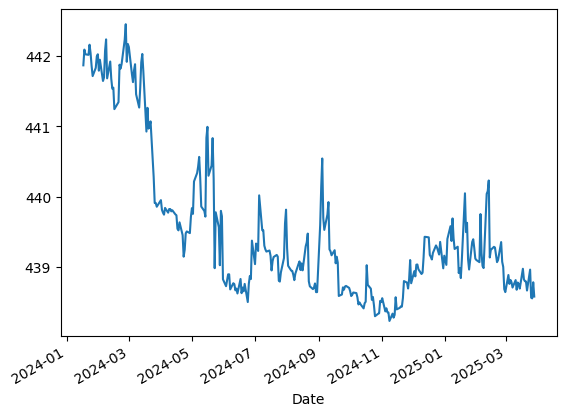

In [ ]:
Y_pred = rf.predict(X_test)
Y_pred_denorm = (Y_pred * test_std + test_mean)* first_prices.values

predicted_prices = pd.DataFrame(Y_pred_denorm, index=data.index[-len(Y_pred):], columns=data.columns)
predicted_prices.index = data.index[-len(predicted_prices):]
predicted_prices["SPY"].plot()

In [ ]:
# SUMMARY
y_test_denorm = y_test * first_prices.values


mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
rmse = np.sqrt(mse)


# print(f"Mean Absolute Error for not normalized: {mae:.4f}" )
print("Mean Squared Error for not normalized:", mse)
# print("Root Mean Squared Error for not normalized:", rmse)
print("R² Score not normalized:", r2)

r2_denorm = r2_score(y_test_denorm, Y_pred_denorm)
mse_denorm = mean_squared_error(y_test_denorm, Y_pred_denorm)
print("=====================")
print("Mean Squared Error:", mse_denorm)
print("R² Score:", r2)



Mean Squared Error for not normalized: 0.08171137480025771
R² Score not normalized: -1.6486245136040742
Mean Squared Error: 528.436288324027
R² Score: -1.6486245136040742


In [ ]:
display(labels_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
data

,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,21.902443,6.246624,40.000000,42.619999,26.042212,22.380077,42.757008,12.307330,20.625574,14.720881,...,28.830000,100.450684,83.888573,317.519989,69.905655,42.300957,27.664722,34.591938,33.707809,6.78375
2012-01-04,21.902443,6.246624,40.000000,42.509998,26.165096,22.380077,42.757008,12.452251,20.587934,14.581520,...,28.389999,100.608261,82.891136,318.160004,70.114944,42.300957,27.328695,34.000530,33.888020,6.69750
2012-01-05,21.902443,6.246624,40.000000,41.509998,25.814005,22.380077,42.757008,12.290605,20.459967,14.412823,...,28.510000,100.876129,82.743668,313.359985,69.817871,42.300957,26.831099,34.319885,33.472149,6.68250
2012-01-06,21.902443,6.246624,40.000000,41.349998,25.919331,22.380077,42.757008,12.128960,20.249193,14.148770,...,27.910000,100.616127,83.396919,313.760010,69.392532,42.300957,26.462753,34.207520,33.070118,6.72625
2012-01-09,21.902443,6.246624,40.000000,42.189999,25.831558,22.380077,42.757008,12.167979,20.309414,14.207450,...,28.129999,100.860359,83.249390,312.640015,69.655830,42.300957,26.663073,34.089233,33.097832,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405000,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,88.790054,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440000,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,88.780167,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400000,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.196609,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [ ]:
predicted_prices

,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-17,33.864796,8.602838,76.289100,20.198176,14.605227,109.215091,50.608374,21.966889,35.170475,27.580113,...,20.903934,441.867063,90.043640,69.045730,106.637709,110.800524,59.520080,82.719419,68.193270,6.484279
2024-01-18,33.862398,8.453757,73.423300,20.225936,14.599335,109.163565,50.391836,21.829955,34.959386,27.520291,...,20.324834,442.090092,90.070896,69.365570,106.450102,110.873196,59.399982,80.776780,67.813773,6.205742
2024-01-19,33.875946,8.560460,74.013450,20.215336,14.905489,109.126684,50.556152,21.956204,35.122049,27.725130,...,20.792912,442.023631,89.221687,70.088217,106.465298,110.765388,59.505387,80.742875,67.892018,6.440479
2024-01-22,33.891551,8.562158,73.083200,20.211178,14.830047,109.135547,51.633485,22.260199,35.403969,28.027807,...,20.315234,442.015890,89.523186,70.220679,106.464039,110.853106,59.512063,80.835170,68.020405,6.441716
2024-01-23,33.927299,8.488593,73.938600,20.244776,14.946781,109.039580,50.654413,22.244826,35.429300,28.038096,...,20.067366,442.159519,89.914102,70.114912,106.630809,110.796219,59.542736,80.885113,68.369916,6.435704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,37.442222,9.915909,97.031748,18.859375,15.068461,108.743487,56.151817,22.840464,37.003269,32.189483,...,28.358993,438.966598,90.211016,73.249630,105.603440,110.545731,61.791251,89.437801,74.602365,8.239582
2025-03-25,38.217890,10.318462,100.029555,18.862776,15.073221,108.455916,56.502302,22.873473,37.034188,32.218453,...,28.308114,438.568485,89.584220,75.832714,105.603440,110.528927,61.781365,90.470461,74.656908,8.228072
2025-03-26,38.185746,10.414011,99.939942,18.856805,15.063079,108.378890,56.459517,22.880430,37.031292,32.219273,...,28.971501,438.558722,89.362240,75.880167,105.587527,110.500232,61.772942,89.913689,74.518944,8.152498


In [ ]:
index_series = data.index[train_size + val_size + window_size:]

y_test_shift = data[train_size + val_size + window_size - 1: -1]
y_test_shift_index = data.index[train_size + val_size + window_size-1: -1]

y_test_shift_df = pd.DataFrame(y_test_shift, index=y_test_shift_index, columns=data.columns)
y_test_shift_array = y_test_shift_df.values


predicted_directions = (Y_pred_denorm > y_test_shift_array).astype(int)
predicted_directions_df = pd.DataFrame(predicted_directions, index=index_series, columns=data.columns)
display(predicted_directions_df)


,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-17,0,1,1,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2024-01-18,0,1,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
2024-01-19,0,1,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
2024-01-22,0,1,1,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2024-01-23,0,1,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2025-03-25,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2025-03-26,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


In [ ]:
from sklearn.metrics import accuracy_score

actual_flat = labels_test.flatten()
predicted_flat = predicted_directions_df.to_numpy().flatten()

accuracy = accuracy_score(actual_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4999


In [ ]:
y_test_denorm.shape

(310, 33)

y_test_denorm shape: (310, 33)


,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-17,33.864796,8.602838,76.289100,20.198176,14.605227,109.215091,50.608374,21.966889,35.170475,27.580113,...,20.903934,441.867063,90.043640,69.045730,106.637709,110.800524,59.520080,82.719419,68.193270,6.484279
2024-01-18,33.862398,8.453757,73.423300,20.225936,14.599335,109.163565,50.391836,21.829955,34.959386,27.520291,...,20.324834,442.090092,90.070896,69.365570,106.450102,110.873196,59.399982,80.776780,67.813773,6.205742
2024-01-19,33.875946,8.560460,74.013450,20.215336,14.905489,109.126684,50.556152,21.956204,35.122049,27.725130,...,20.792912,442.023631,89.221687,70.088217,106.465298,110.765388,59.505387,80.742875,67.892018,6.440479
2024-01-22,33.891551,8.562158,73.083200,20.211178,14.830047,109.135547,51.633485,22.260199,35.403969,28.027807,...,20.315234,442.015890,89.523186,70.220679,106.464039,110.853106,59.512063,80.835170,68.020405,6.441716
2024-01-23,33.927299,8.488593,73.938600,20.244776,14.946781,109.039580,50.654413,22.244826,35.429300,28.038096,...,20.067366,442.159519,89.914102,70.114912,106.630809,110.796219,59.542736,80.885113,68.369916,6.435704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,37.442222,9.915909,97.031748,18.859375,15.068461,108.743487,56.151817,22.840464,37.003269,32.189483,...,28.358993,438.966598,90.211016,73.249630,105.603440,110.545731,61.791251,89.437801,74.602365,8.239582
2025-03-25,38.217890,10.318462,100.029555,18.862776,15.073221,108.455916,56.502302,22.873473,37.034188,32.218453,...,28.308114,438.568485,89.584220,75.832714,105.603440,110.528927,61.781365,90.470461,74.656908,8.228072
2025-03-26,38.185746,10.414011,99.939942,18.856805,15.063079,108.378890,56.459517,22.880430,37.031292,32.219273,...,28.971501,438.558722,89.362240,75.880167,105.587527,110.500232,61.772942,89.913689,74.518944,8.152498


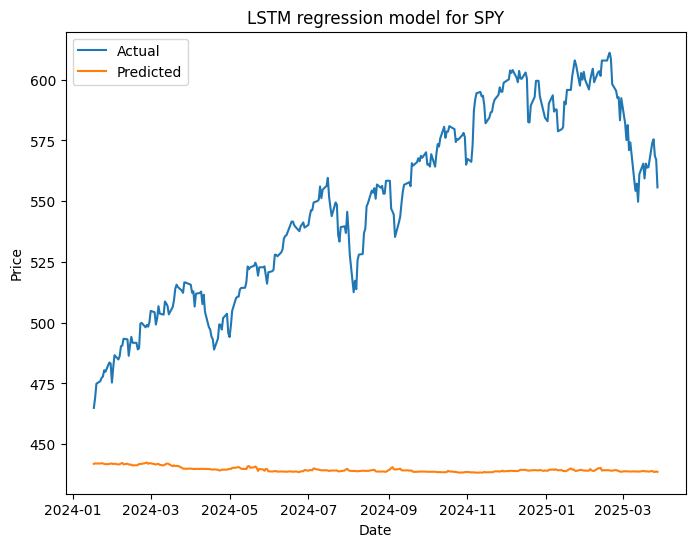

In [ ]:
y_test_denorm = y_test * first_prices.values
print(f"y_test_denorm shape: {y_test_denorm.shape}")
y_test_denorm= y_test_denorm[-test_size:]
y_actual = pd.DataFrame(y_test_denorm, index=data.index[-test_size+window_size::], columns=data.columns)
display(predicted_prices)
ticker_name = 'SPY'

plt.figure(figsize=(8,6))
plt.plot(y_actual[ticker_name], label='Actual')
plt.plot(predicted_prices[ticker_name], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'LSTM regression model for {ticker_name}')
plt.legend()
plt.show()


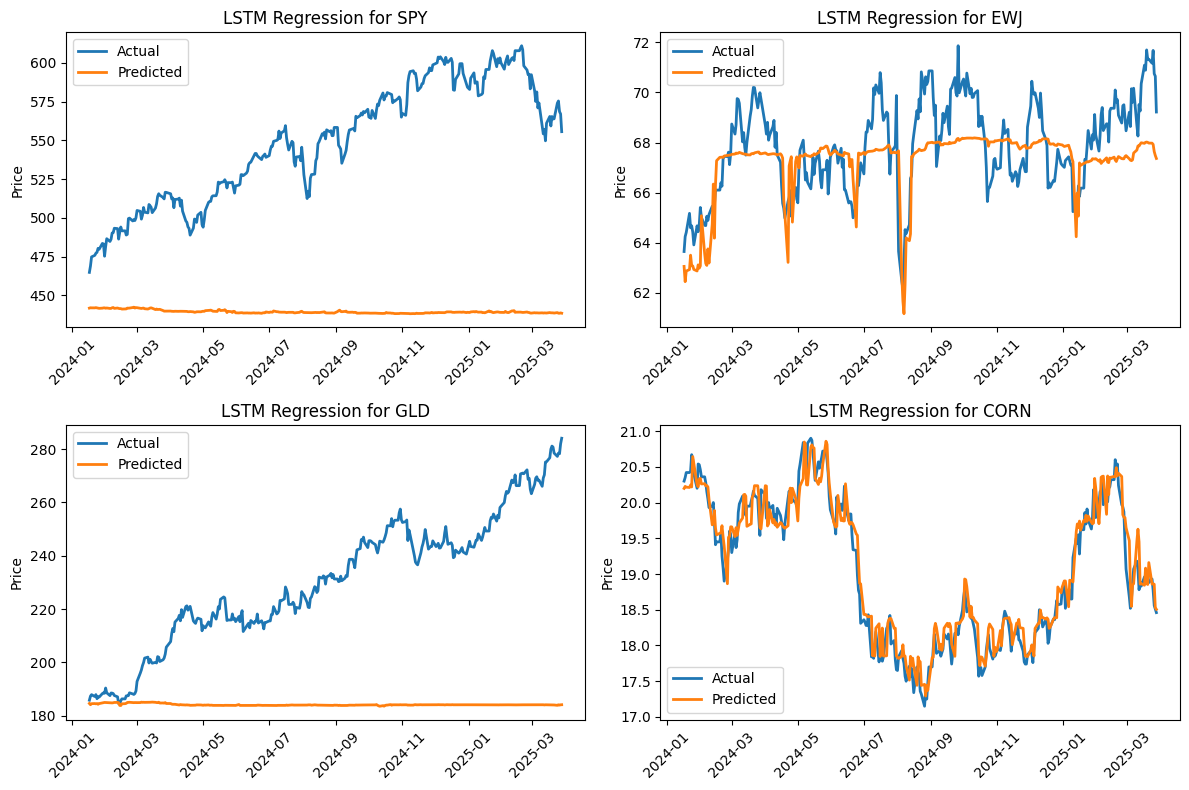

In [ ]:
ticker_name = ['SPY', 'EWJ', 'GLD', 'CORN'] 
num_plots = len(ticker_name)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()  

for i, ticker in enumerate(ticker_name):
    ax = axes[i]
    ax.plot(y_actual[ticker], label='Actual', linewidth=2)
    ax.plot(predicted_prices[ticker], label='Predicted', linewidth=2)
    ax.set_title(f'LSTM Regression for {ticker}')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

    ax.legend()

for j in range(len(ticker_name), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
yesterday_prices = data.iloc[-2]  # second last row 

today_prices_actual = data.iloc[-1] # last row

today_prices_predicted = predicted_prices.mean(axis=0)  

comparison_df = pd.DataFrame({
    'Yesterday_actual': yesterday_prices,
    'Today_actual': today_prices_actual,
    'Today_pred': today_prices_predicted,
})

tickers_names = data.columns

correct_list = []
for ticker in tickers_names:
    yesterday = yesterday_prices[ticker]
    actual_today = today_prices_actual[ticker]
    predicted = today_prices_predicted[ticker]

    sign_actual = np.sign(actual_today - yesterday)
    sign_pred = np.sign(predicted - yesterday)

    if sign_actual == sign_pred:
        correct_list.append(1)
    else:
        correct_list.append(0)
comparison_df['Correct'] = correct_list

count_of_ones = correct_list.count(1)
print(f"Count of correct predictions: {count_of_ones}")
print(f"accuracy: {count_of_ones / len(correct_list)}")
display(comparison_df)
save_df = comparison_df.copy()
save_df['Yesterday actual'] = save_df['Yesterday_actual'].apply(lambda x: round(x, 2))
save_df['Today actual'] = save_df['Today_actual'].apply(lambda x: round(x, 2))
save_df['Today prediction'] = save_df['Today_pred'].apply(lambda x: round(x, 2))
save_df['Correct'] = save_df['Correct'].apply(lambda x: round(x, 2))
save_df.to_csv('rf_regression.csv')


Count of correct predictions: 25
accuracy: 0.7575757575757576


,Yesterday_actual,Today_actual,Today_pred,Correct
AIEQ,37.658001,36.845001,37.252804,1
ASHR.L,10.460000,10.340000,9.559333,1
BCHN.L,97.080002,92.714996,97.806278,0
CORN,18.510000,18.459999,19.099022,0
DBO,14.130000,13.970000,15.145906,0
EDEN,105.330002,105.169998,108.579504,0
EMXC,56.110001,55.180000,56.078232,1
EWA,23.750000,23.469999,22.881405,1
EWC,41.250000,40.570000,36.753792,1
EWG,37.590000,37.389999,31.151176,1
